<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Monthly-Debt-and-Max-Credit" data-toc-modified-id="Monthly-Debt-and-Max-Credit-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Monthly Debt and Max Credit</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Duplicates</a></span></li></ul></li></ul></li><li><span><a href="#Fill-null-values" data-toc-modified-id="Fill-null-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fill null values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bankruptcies" data-toc-modified-id="Bankruptcies-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Bankruptcies</a></span></li><li><span><a href="#Credit-Score" data-toc-modified-id="Credit-Score-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Credit Score</a></span></li><li><span><a href="#Annual-Income" data-toc-modified-id="Annual-Income-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Annual Income</a></span></li><li><span><a href="#Months-since-last-delinquent" data-toc-modified-id="Months-since-last-delinquent-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Months since last delinquent</a></span></li><li><span><a href="#Tax-Liens" data-toc-modified-id="Tax-Liens-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Tax Liens</a></span></li><li><span><a href="#Years-in-current-job" data-toc-modified-id="Years-in-current-job-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>Years in current job</a></span></li></ul></li></ul></li><li><span><a href="#Check-distribution" data-toc-modified-id="Check-distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check distribution</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Annual-income" data-toc-modified-id="Annual-income-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Annual income</a></span></li><li><span><a href="#Maximum-Open-Credit" data-toc-modified-id="Maximum-Open-Credit-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Maximum Open Credit</a></span></li><li><span><a href="#next" data-toc-modified-id="next-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>next</a></span></li></ul></li></ul></li><li><span><a href="#Dummies-and-binary-variables" data-toc-modified-id="Dummies-and-binary-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dummies and binary variables</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span></li></ul></div>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string as st
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
import pandas_profiling

In [2]:
train = pd.read_csv('1533148983_LoansTrainingSet.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

#### Monthly Debt and Max Credit

In [5]:
train['Monthly Debt'] = train['Monthly Debt'].str.strip('$')
train['Monthly Debt'] = train['Monthly Debt'].str.replace(',', '')

train.drop(train.index[train['Maximum Open Credit']=='#VALUE!'], inplace=True)

train[['Monthly Debt', 'Maximum Open Credit']] = train[['Monthly Debt', 'Maximum Open Credit']].astype('float')

#### Duplicates

In [6]:
def getDupes(l):
    seen = set()
    seen_add = seen.add
    for x in l:
        if x in seen or seen_add(x):
            yield x

In [7]:
dups = list(getDupes(train['Customer ID']))

In [8]:
dups = list(getDupes(train['Customer ID']))
dups

['e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc',
 'afbc2fa3-3bad-4d48-b691-829aed78bad5',
 'afbc2fa3-3bad-4d48-b691-829aed78bad5',
 'afbc2fa3-3bad-4d48-b691-829aed78bad5',
 '28eb75ac-6a09-4057-b73f-726c72ebf933',
 '727bb429-dfa1-41c4-a347-23230e23949f',
 'c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954',
 'b533c78c-3096-4914-acb1-5453c0ff76a4',
 '04513d99-d809-4eb6-b4bb-6abc767d861e',
 '4b7782a6-b84c-4dd9-ac62-f927a68eeaa9',
 '881edf98-387c-4eef-ab71-317a7a5e70c1',
 '442c2d9b-3d95-44a9-bcb4-0dc80a941e3c',
 '0ecf29b6-93eb-4c13-b853-a9cbdfc7f85b',
 '3d4a8985-0b72-4084-8b20-f441d9868483',
 '11e878dc-0982-4c6b-a32a-ef5fca6ed6f4',
 '2eba693e-f810-459d-8df7-9a2376138466',
 'f7d50460-c0a5-45d0-ae25-891947b4c7b9',
 'cc73a15c-7ad4-4101-a2af-57306c335285',
 'cc73a15c-7ad4-4101-a2af-57306c335285',
 'cc73a15c-7ad4-4101-a2af-57306c335285',
 'c550dd85-dccb-4441-b2fe-a06e90bf48de',
 '0d419e30-7336-4e52-980d-8c17365acc67',
 '45aa9267-04f2-49b5-8991-7bb1ffc8f669',
 '9681f4f0-4d57-48e2-917d-a5f6d3accaab',
 '79791672-07e1-

In [9]:
test = train[train['Customer ID'] == 'e1fbde58-5f55-42ed-af5a-cafe9d7e22c9']

In [10]:
test.bfill()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
436,006d81cf-6ced-4840-9a33-9783fc02d841,e1fbde58-5f55-42ed-af5a-cafe9d7e22c9,Charged Off,7662,Long Term,726.0,10+ years,Home Mortgage,26469.0,Debt Consolidation,467.63,19.8,79.0,6,0,4607,5339.0,0.0,0.0
437,006d81cf-6ced-4840-9a33-9783fc02d841,e1fbde58-5f55-42ed-af5a-cafe9d7e22c9,Charged Off,7662,Long Term,726.0,10+ years,Home Mortgage,26469.0,Debt Consolidation,467.63,19.8,79.0,6,0,4607,5339.0,0.0,0.0


In [11]:
train = train.drop_duplicates(subset='Customer ID')

In [12]:
dups = list(getDupes(train['Customer ID']))
dups

[]

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215698 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         215698 non-null object
Customer ID                     215698 non-null object
Loan Status                     215698 non-null object
Current Loan Amount             215698 non-null int64
Term                            215698 non-null object
Credit Score                    160691 non-null float64
Years in current job            206708 non-null object
Home Ownership                  215698 non-null object
Annual Income                   160691 non-null float64
Purpose                         215698 non-null object
Monthly Debt                    215698 non-null float64
Years of Credit History         215698 non-null float64
Months since last delinquent    97437 non-null float64
Number of Open Accounts         215698 non-null int64
Number of Credit Problems       215698 non-null int64
Current Credit Balance          215698 non-null int64
Maximum O

In [14]:
train['Loan Status'].replace(['Fully Paid', 'Charged Off'], [1, 0], inplace=True)

In [15]:
abs(train.corrwith(train['Current Loan Amount'])).sort_values(ascending=False)

Current Loan Amount             1.000000
Loan Status                     0.209136
Credit Score                    0.165812
Annual Income                   0.015075
Years of Credit History         0.012001
Maximum Open Credit             0.005703
Bankruptcies                    0.003643
Current Credit Balance          0.002314
Tax Liens                       0.001877
Number of Credit Problems       0.001094
Number of Open Accounts         0.000902
Months since last delinquent    0.000859
Monthly Debt                    0.000128
dtype: float64

In [16]:
# Annual Income

AI1 = int(train['Annual Income'].quantile(.25))
AI3 = int(train['Annual Income'].quantile(.75))

In [17]:
cl1 = train[(train['Credit Score'] < 640)&(train['Credit Score'] > 580)&(train['Annual Income']<=AI1)
            &(train['Current Loan Amount']<1000000)]['Current Loan Amount'].mean()

cl2 = train[(train['Credit Score'] < 640)&(train['Credit Score'] > 580)&(train['Annual Income']>AI1)
            &(train['Annual Income']<AI3)
            &(train['Current Loan Amount']<1000000)]['Current Loan Amount'].mean()

cl3 = train[(train['Credit Score'] < 640)&(train['Credit Score'] > 580)&(train['Annual Income']>=AI3)
            &(train['Current Loan Amount']<1000000)]['Current Loan Amount'].mean()

train.loc[((train['Credit Score'] < 640)&(train['Credit Score'] > 580)&(train['Annual Income']<=AI1)
            &(train['Current Loan Amount']>1000000)),'Current Loan Amount'] = cl1
train.loc[((train['Credit Score'] < 640)&(train['Credit Score'] > 580)&(train['Annual Income']>AI1)
            &(train['Annual Income']<AI3)
            &(train['Current Loan Amount']>1000000)),'Current Loan Amount'] = cl2
train.loc[((train['Credit Score'] < 640)&(train['Credit Score'] > 580)&(train['Annual Income']>=AI3)
            &(train['Current Loan Amount']>1000000)),'Current Loan Amount'] = cl3




cl1_2 = train[(train['Credit Score'] < 700)&(train['Credit Score'] >= 640)&(train['Annual Income']<=AI1)
            &(train['Current Loan Amount']<1000000)]['Current Loan Amount'].mean()
cl2_2 = train[(train['Credit Score'] < 700)&(train['Credit Score'] >= 640)&(train['Annual Income']>AI1)
            &(train['Annual Income']<AI3)
            &(train['Current Loan Amount']<1000000)]['Current Loan Amount'].mean()
cl3_2 = train[(train['Credit Score'] < 700)&(train['Credit Score'] >= 640)&(train['Annual Income']>=AI3)
            &(train['Current Loan Amount']<1000000)]['Current Loan Amount'].mean()

train.loc[((train['Credit Score'] < 700)&(train['Credit Score'] >= 640)&(train['Annual Income']<=AI1)
            &(train['Current Loan Amount']>1000000)), 'Current Loan Amount'] = cl1_2
train.loc[((train['Credit Score'] < 700)&(train['Credit Score'] >= 640)&(train['Annual Income']>AI1)
            &(train['Annual Income']<AI3)
            &(train['Current Loan Amount']>1000000)), 'Current Loan Amount'] = cl2_2
train.loc[((train['Credit Score'] < 700)&(train['Credit Score'] >= 640)&(train['Annual Income']>=AI3)
            &(train['Current Loan Amount']>1000000)), 'Current Loan Amount'] = cl3_2



cl1_3 = train[(train['Credit Score'] >=700)&(train['Annual Income']<=AI1)
            &(train['Current Loan Amount']<1000000)]['Current Loan Amount'].mean()
cl2_3 = train[(train['Credit Score'] >=700)&(train['Annual Income']>AI1)
            &(train['Annual Income']<AI3)
            &(train['Current Loan Amount']<1000000)]['Current Loan Amount'].mean()
cl3_3 = train[(train['Credit Score'] >=700)&(train['Annual Income']>=AI3)
            &(train['Current Loan Amount']<1000000)]['Current Loan Amount'].mean()

train.loc[((train['Credit Score'] >=700)&(train['Annual Income']<=AI1)
            &(train['Current Loan Amount']>1000000)), 'Current Loan Amount'] = cl1_3
train.loc[((train['Credit Score'] >=700)&(train['Annual Income']>AI1)
            &(train['Annual Income']<AI3)
            &(train['Current Loan Amount']>1000000)), 'Current Loan Amount'] = cl2_3
train.loc[((train['Credit Score'] >=700)&(train['Annual Income']>=AI3)
            &(train['Current Loan Amount']>1000000)), 'Current Loan Amount'] = cl3_3


## Fill null values

In [102]:
lin_reg = LinearRegression()

def fill_null(df, target, x):
    
    corr = abs(df.corrwith(df[target])).sort_values(ascending=False)[1:x].index
    corr = corr.tolist()
    
    filled = df[df[target].notnull()]
    empty = df[df[target].isnull()]
    
    X, y = filled[corr], filled[target]
    #x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
    
    model = lin_reg.fit(x_train, y_train)
    
    target_test = empty[corr]
    replace = model.predict(target_test)
    
    df.loc[train[target].isnull(), target] = replace
    
    return df

#### Bankruptcies

In [19]:
train['Bankruptcies'].fillna(0, inplace=True)

#### Credit Score

In [20]:
train['Credit Score'] = [i/10 if i>1000 else i*1 for i in train['Credit Score']]
train['Credit Score'].describe()

count    160691.000000
mean        723.566149
std          26.332507
min         585.000000
25%         713.000000
50%         732.000000
75%         742.000000
max         751.000000
Name: Credit Score, dtype: float64

In [21]:
train[train['Credit Score'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,1,10036.0,Short Term,NaN,5 years,Rent,NaN,Debt Consolidation,386.36,17.7,NaN,7,0,11970,16579.0,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,0,17980.0,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,597.50,9.9,43.0,7,0,6817,22800.0,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,0,16929.0,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,745.70,14.9,NaN,10,0,28513,101110.0,0.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,1,7228.0,Short Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,439.56,17.8,NaN,13,1,8488,15866.0,1.0,0.0
26,0004d002-a494-4f8a-a528-a6d513812701,4722d542-6684-431c-afb6-ba2e847f1098,1,4612.0,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,262.27,14.0,NaN,4,0,8919,9330.0,0.0,0.0
38,0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,1,6114.0,Short Term,NaN,NaN,Home Mortgage,NaN,Debt Consolidation,206.97,17.8,21.0,8,1,5772,13975.0,1.0,0.0
46,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,0,21160.0,Long Term,NaN,5 years,Home Mortgage,NaN,Debt Consolidation,1290.98,20.8,NaN,28,0,28175,51227.0,0.0,0.0
57,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,1,7068.0,Short Term,NaN,NaN,Own Home,NaN,other,425.68,21.3,NaN,7,1,4178,6850.0,1.0,0.0
67,000ea0cb-8d0e-4284-b8c8-444ffbbe4caf,db069b01-22c0-4b77-8b0a-b5704a0fd451,1,21075.0,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,2204.13,18.0,NaN,22,0,21135,34366.0,0.0,0.0
76,0011592e-e3f9-4be5-8af7-dfdb671b234f,9a5b7d14-d53a-4e16-8a74-e983d40ea039,1,2355.0,Short Term,NaN,< 1 year,Home Mortgage,NaN,Other,968.38,17.1,17.0,7,0,6682,9319.0,0.0,0.0


In [22]:
abs(train.corrwith(train['Credit Score'])).sort_values(ascending=False)[1:7].index

Index(['Loan Status', 'Current Loan Amount', 'Monthly Debt',
       'Years of Credit History', 'Number of Credit Problems', 'Bankruptcies'],
      dtype='object')

In [108]:
def target(x):
    if x < 0:
        x = x**2
  

In [109]:
target(-9)

In [111]:
dt = -9

In [112]:
target(dt)

In [113]:
dt

-9

#### Annual Income

In [24]:
abs(train.corrwith(train['Annual Income'])).sort_values(ascending=False)

Annual Income                   1.000000
Monthly Debt                    0.466862
Current Loan Amount             0.360292
Current Credit Balance          0.303589
Years of Credit History         0.154596
Number of Open Accounts         0.144504
Months since last delinquent    0.057471
Loan Status                     0.055315
Bankruptcies                    0.047816
Tax Liens                       0.035596
Maximum Open Credit             0.031265
Number of Credit Problems       0.018046
Credit Score                    0.013606
dtype: float64

In [25]:
fill_null(train, 'Annual Income', 6)

#### Months since last delinquent

In [26]:
abs(train.corrwith(train['Annual Income'])).sort_values(ascending=False)

Annual Income                   1.000000
Monthly Debt                    0.520175
Current Loan Amount             0.404049
Current Credit Balance          0.335075
Years of Credit History         0.171585
Number of Open Accounts         0.160598
Months since last delinquent    0.055686
Bankruptcies                    0.054740
Loan Status                     0.041066
Maximum Open Credit             0.035497
Tax Liens                       0.031691
Number of Credit Problems       0.026540
Credit Score                    0.012260
dtype: float64

In [27]:
fill_null(train, 'Months since last delinquent', 6)

#### Tax Liens

In [28]:
train['Tax Liens'].fillna(0, inplace=True)

In [29]:
train['Tax Liens'].mean()

0.0263284777791171

#### Years in current job

In [30]:
train['Years in current job'].fillna('10+ years', inplace=True)

## Check distribution

In [32]:
def del_outliers(df, target, lower, upper):
    
    cutoff_upper = df[target].quantile(1-upper)
    cutoff_lower = df[target].quantile(0+lower)
    
    df.drop(df.index[(df[target]>cutoff_upper)], inplace=True)
    df.drop(df.index[(df[target]<cutoff_lower)], inplace=True)
    

In [33]:
p.ProfileReport(train)

Number of variables,20
Number of observations,215698
Total Missing (%),0.0%
Total size in memory,32.9 MiB
Average record size in memory,160.0 B
Numeric,13
Categorical,4
Boolean,1
Date,0
Text (Unique),2
Rejected,0


#### Annual income

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


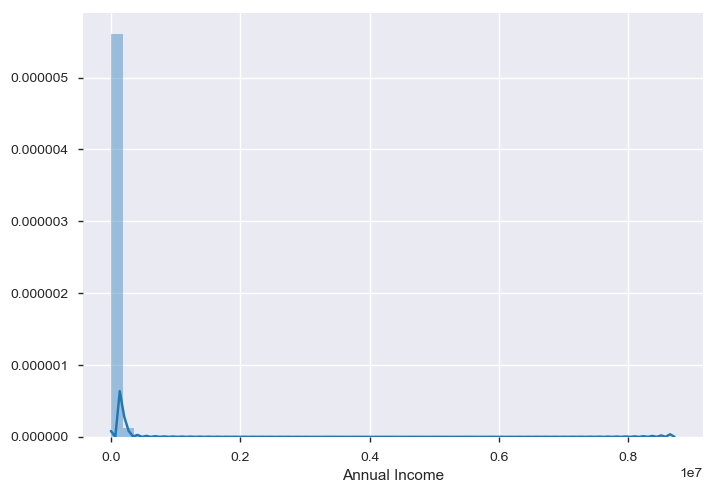

In [34]:
sns.distplot(train['Annual Income'])

In [35]:
del_outliers(train, 'Annual Income', 0, .01)

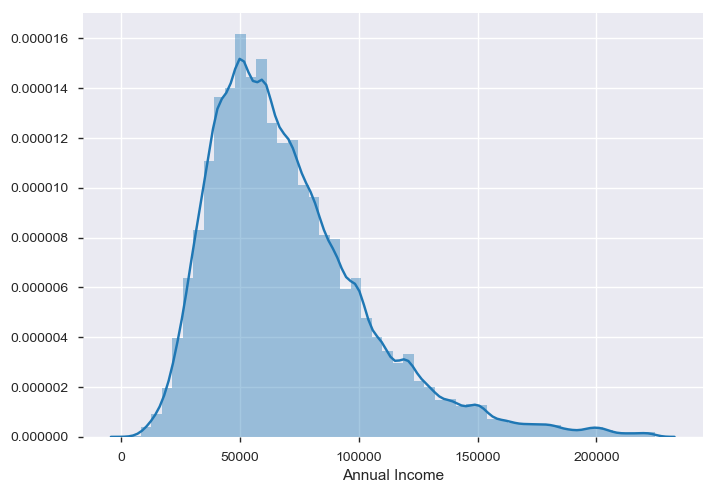

In [36]:
sns.distplot(train['Annual Income'])

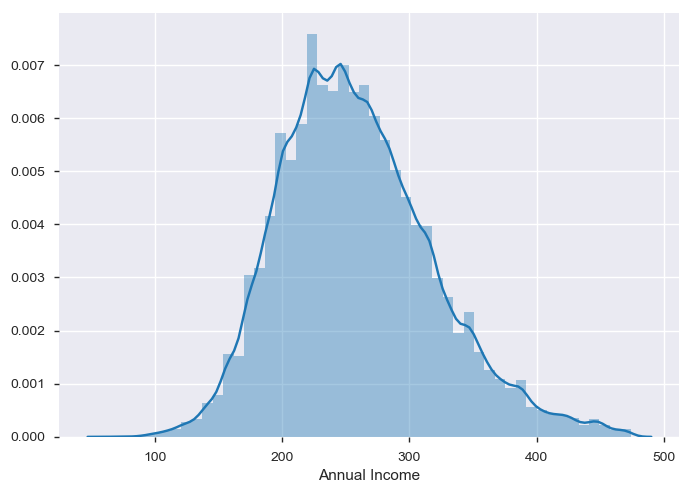

In [37]:
sns.distplot(np.sqrt(train['Annual Income']))

In [38]:
train['Annual Income'] = np.sqrt(train['Annual Income'])

#### Maximum Open Credit

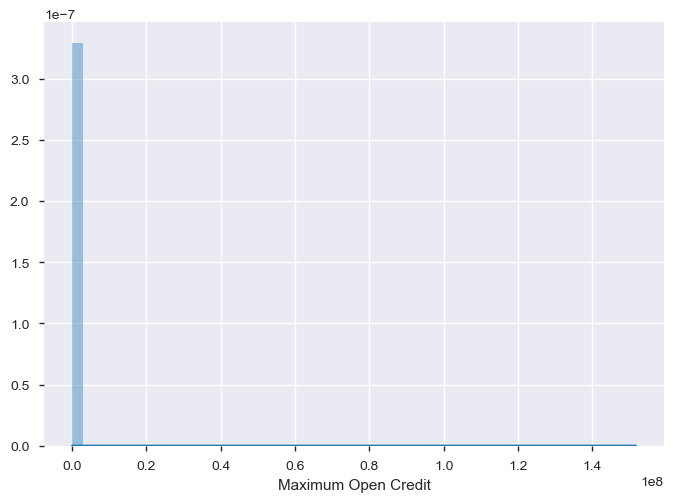

In [39]:
sns.distplot(train['Maximum Open Credit'])

In [40]:
del_outliers(train, 'Maximum Open Credit', 0.01, 0.01)

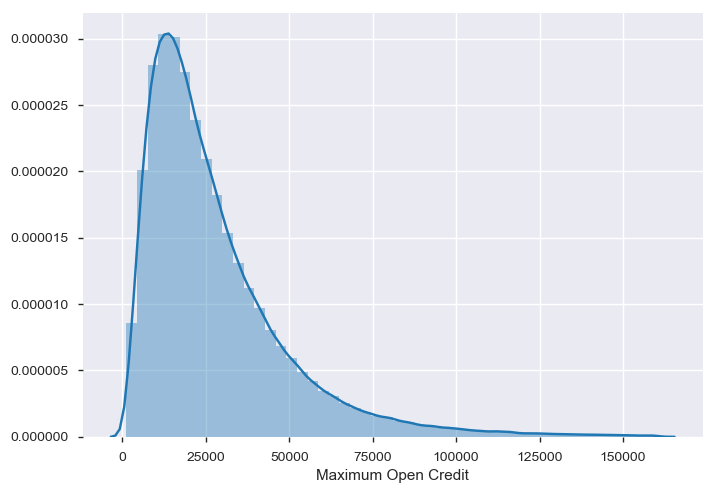

In [41]:
sns.distplot(train['Maximum Open Credit'])

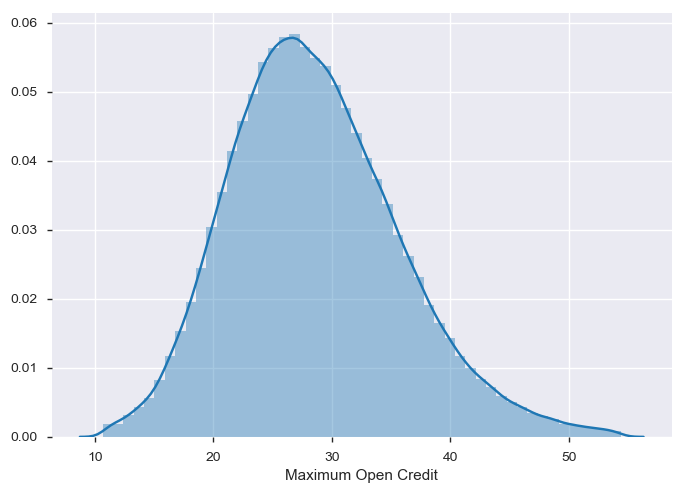

In [42]:
sns.distplot(np.cbrt(train['Maximum Open Credit']))

In [43]:
train['Maximum Open Credit'] = np.cbrt(train['Maximum Open Credit'])

#### next

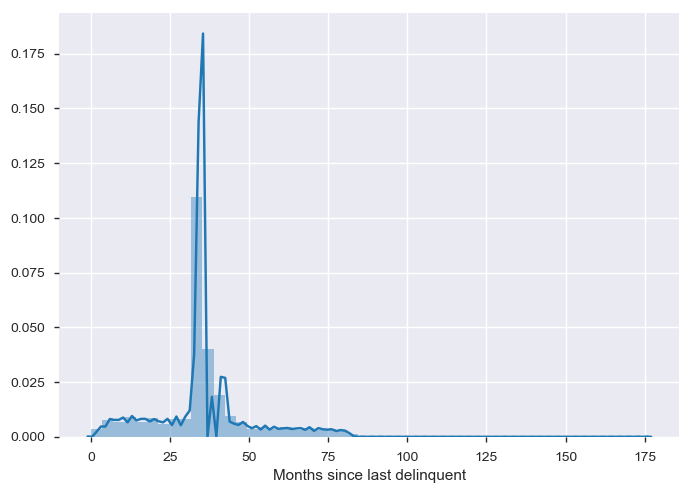

In [44]:
sns.distplot(train['Months since last delinquent'])

In [45]:
train[(train['Months since last delinquent']>75)].count()

Loan ID                         4096
Customer ID                     4096
Loan Status                     4096
Current Loan Amount             4096
Term                            4096
Credit Score                    4096
Years in current job            4096
Home Ownership                  4096
Annual Income                   4096
Purpose                         4096
Monthly Debt                    4096
Years of Credit History         4096
Months since last delinquent    4096
Number of Open Accounts         4096
Number of Credit Problems       4096
Current Credit Balance          4096
Maximum Open Credit             4096
Bankruptcies                    4096
Tax Liens                       4096
dtype: int64

In [46]:
train['Months since last delinquent'].quantile(.99)

79.0

In [47]:
del_outliers(train, 'Months since last delinquent', 0, 0.01)

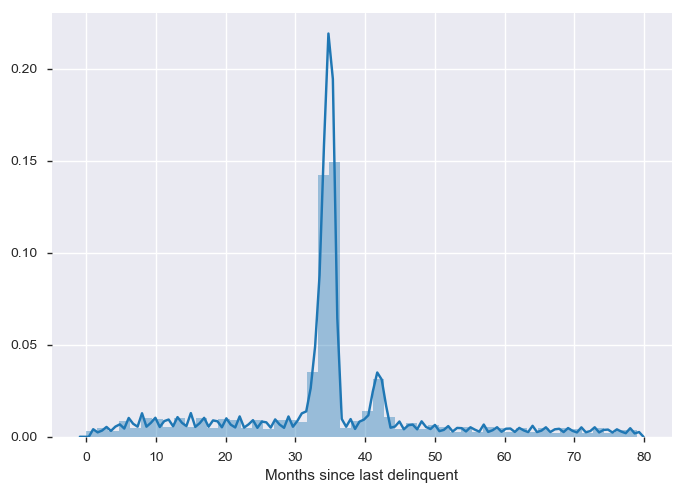

In [48]:
sns.distplot(train['Months since last delinquent'], bins=50)

## Dummies and binary variables

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207682 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         207682 non-null object
Customer ID                     207682 non-null object
Loan Status                     207682 non-null int64
Current Loan Amount             207682 non-null float64
Term                            207682 non-null object
Credit Score                    207682 non-null float64
Years in current job            207682 non-null object
Home Ownership                  207682 non-null object
Annual Income                   207682 non-null float64
Purpose                         207682 non-null object
Monthly Debt                    207682 non-null float64
Years of Credit History         207682 non-null float64
Months since last delinquent    207682 non-null float64
Number of Open Accounts         207682 non-null int64
Number of Credit Problems       207682 non-null int64
Current Credit Balance          207682 non-null int64
Maximum

In [50]:
abs(train.corrwith(train['Loan Status'])).sort_values(ascending=False)

Loan Status                     1.000000
Credit Score                    0.268850
Current Loan Amount             0.061274
Maximum Open Credit             0.056552
Annual Income                   0.048915
Years of Credit History         0.027548
Monthly Debt                    0.021293
Number of Open Accounts         0.020231
Months since last delinquent    0.014953
Tax Liens                       0.009208
Number of Credit Problems       0.007393
Current Credit Balance          0.005761
Bankruptcies                    0.000937
dtype: float64

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207682 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         207682 non-null object
Customer ID                     207682 non-null object
Loan Status                     207682 non-null int64
Current Loan Amount             207682 non-null float64
Term                            207682 non-null object
Credit Score                    207682 non-null float64
Years in current job            207682 non-null object
Home Ownership                  207682 non-null object
Annual Income                   207682 non-null float64
Purpose                         207682 non-null object
Monthly Debt                    207682 non-null float64
Years of Credit History         207682 non-null float64
Months since last delinquent    207682 non-null float64
Number of Open Accounts         207682 non-null int64
Number of Credit Problems       207682 non-null int64
Current Credit Balance          207682 non-null int64
Maximum

In [52]:
train.drop(['Loan ID', 'Customer ID'],1,  inplace=True)

In [53]:
train = pd.get_dummies(train)

## Modeling

In [59]:
train.columns = train.columns.str.replace(' ', '')
train.columns = train.columns.str.replace(',', '')
#train.columns = train.columns.str.replace('<', '')

In [60]:
train.columns

Index(['LoanStatus', 'CurrentLoanAmount', 'CreditScore', 'AnnualIncome',
       'MonthlyDebt', 'YearsofCreditHistory', 'Monthssincelastdelinquent',
       'NumberofOpenAccounts', 'NumberofCreditProblems',
       'CurrentCreditBalance', 'MaximumOpenCredit', 'Bankruptcies', 'TaxLiens',
       'Term_LongTerm', 'Term_ShortTerm', 'Yearsincurrentjob_1year',
       'Yearsincurrentjob_10+years', 'Yearsincurrentjob_2years',
       'Yearsincurrentjob_3years', 'Yearsincurrentjob_4years',
       'Yearsincurrentjob_5years', 'Yearsincurrentjob_6years',
       'Yearsincurrentjob_7years', 'Yearsincurrentjob_8years',
       'Yearsincurrentjob_9years', 'Yearsincurrentjob_<1year',
       'HomeOwnership_HaveMortgage', 'HomeOwnership_HomeMortgage',
       'HomeOwnership_OwnHome', 'HomeOwnership_Rent', 'Purpose_BusinessLoan',
       'Purpose_BuyHouse', 'Purpose_BuyaCar', 'Purpose_DebtConsolidation',
       'Purpose_EducationalExpenses', 'Purpose_HomeImprovements',
       'Purpose_MedicalBills', 'Purpose_Oth

In [67]:
train['YrsLessthanYR'] = train['Yearsincurrentjob_<1year']
train.drop('Yearsincurrentjob_<1year', 1, inplace=True)

In [69]:
X, y = train.drop('LoanStatus', 1), train['LoanStatus']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=7)

In [86]:
parameter_grid = {'n_estimators': [100,200,500,1000],
                 'max_depth': [1, 2, 3, 4, 5],
                 'max_features': ['sqrt', 'log2'],
                 'warm_start': [True, False],
                 'max_leaf_nodes': [None, 5, 10, 100]}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(),
                           param_grid=parameter_grid,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2,
                           cv = 5
                           )
 
grid_search.fit(train.drop('LoanStatus',axis=1),train['LoanStatus'])

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 73.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 131.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 230.7min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 279.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500, 1000], 'max_depth': [1, 2, 3, 4, 5], 'max_features': ['sqrt', 'log2'], 'warm_start': [True, False], 'max_leaf_nodes': [None, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [87]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 100,
 'n_estimators': 1000,
 'warm_start': True}

In [88]:
grid_search.best_score_

-0.13795129091591954

In [91]:
model = GradientBoostingClassifier(max_depth= 5,
 max_features=None,max_leaf_nodes=100,n_estimators=1000, 
warm_start=True).fit(train.drop('LoanStatus',axis=1),train['LoanStatus'])

importance = model.feature_importances_
final = pd.DataFrame()
final['Importance'] = importance
final['Column'] = x_test.columns

final.sort_values('Importance',ascending=False,axis=0).head(10)

,Importance,Column
1,0.470896,CreditScore
0,0.243728,CurrentLoanAmount
2,0.069135,AnnualIncome
4,0.045724,YearsofCreditHistory
3,0.036104,MonthlyDebt
9,0.026101,MaximumOpenCredit
8,0.026042,CurrentCreditBalance
5,0.022080,Monthssincelastdelinquent
7,0.012365,NumberofCreditProblems
6,0.011497,NumberofOpenAccounts


In [92]:
accuracy_score(y_test, model.predict(x_test))

0.9116691142836507

In [114]:
f1_score(y_test, model.predict(x_test))

0.9483392236099183

HaveMortgage, HomeMortgage
other, Other

Read about confusion matrices. When should I care about certain 